In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#보스턴 주택 가격 데이터셋

from keras.datasets import boston_housing
(train_data, train_labels),(test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
mean = train_data.mean(axis = 0) # 0번 축 = 칼럼들

In [ ]:
train_data -= mean
#train_data = train_data - mean 과 같은 의미

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [ ]:
# 표준편차 구하기
std = train_data.std(axis = 0)

In [ ]:
train_data /= std
#train_data = train_data / std 와 같은 뜻

In [ ]:
mean = test_data.mean(axis = 0)
test_data -= mean
std = test_data.std(axis = 0)
test_data /= std

In [ ]:
test_data

array([[ 2.8040301 , -0.50784934,  0.96960877, ...,  0.90513041,
        -4.27829517,  2.51324773],
       [-0.55530596, -0.50784934, -0.17801704, ..., -0.28485844,
         0.3909446 ,  0.58604286],
       [-0.56808398, -0.50784934, -0.86176938, ...,  0.90513041,
         0.41570668, -0.38506427],
       ...,
       [-0.23539182, -0.50784934,  1.17955762, ..., -1.82192738,
         0.32313459, -1.55879807],
       [-0.5113909 , -0.50784934, -0.71849348, ..., -0.48318992,
         0.34967446, -0.38956708],
       [-0.03148414, -0.50784934,  1.17955762, ..., -1.82192738,
        -1.57465677, -0.3745577 ]])

In [20]:
#신경망을 만든다.
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = 'relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(1))

  model.compile(optimizer='rmsprop',
                loss = 'mse',
                metrics = ['mae'])
  
  return model

In [24]:
# K-folder 검증
k = 4

num_val_samples = len(train_data) // k #폴더의 사이즈
all_scores = []

for i in range(k):
  print('처리중인 폴드 #', i)

  #검증 데이터 준비: k번째 분할
  val_data = train_data[i * num_val_samples :(i + 1)* num_val_samples]
  val_labels = train_labels[i * num_val_samples : (i + 1) * num_val_samples]

  #훈련 데이터 준비
  partial_train_data = np.concatenate(
    [train_data[: i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]], axis = 0)
  
  partiala_train_labels = np.concatenate(
    [train_labels[: i * num_val_samples],
    train_labels[(i + 1) * num_val_samples:]], axis = 0)
  
  model = build_model()
  model.fit(partial_train_data, partiala_train_labels, epochs = 20, batch_size=1,
            verbose = 0)

  val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)
  all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [25]:
all_scores

[2.8055293560028076,
 2.7780628204345703,
 2.8977208137512207,
 2.8250608444213867]

In [26]:
k = 4
num_epochs = 500

num_val_samples = len(train_data) // k #폴더의 사이즈
all_scores = []

for i in range(k):
  print('처리중인 폴드 #', i)

  #검증 데이터 준비: k번째 분할
  val_data = train_data[i * num_val_samples :(i + 1)* num_val_samples]
  val_labels = train_labels[i * num_val_samples : (i + 1) * num_val_samples]

  #훈련 데이터 준비
  partial_train_data = np.concatenate(
    [train_data[: i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]], axis = 0)
  
  partiala_train_labels = np.concatenate(
    [train_labels[: i * num_val_samples],
    train_labels[(i + 1) * num_val_samples:]], axis = 0)
  
  model = build_model()
  history = model.fit(partial_train_data, partiala_train_labels, epochs = num_epochs, batch_size=1,
            verbose = 0)

  mae_history = history.history['mae']
  all_scores.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [29]:
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]

Text(0, 0.5, 'Validation MAE')

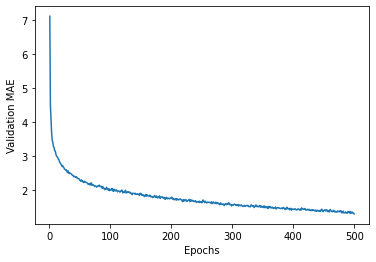

In [30]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')